# Homework: Expectation Maximization

Assuming the lifetime of a machine follows an exponential distribution with an unknown mean value  $\theta$. A total of $N+M$ machines were tested in two independent experiments:

a) In the first experiment, $N $ machines were tested, and their exact lifetimes $x_{1},\dots,x_{N}$ were recorded.

b) In the second experiment, the experimenter entered the laboratory at a certain time $k > 0$ and recorded that some $M$ machines were still running while others had already failed. Therefore, the results of the second experiment are right-censored (greater than some value but unknown) or left-censored (less than some value but unknown). The available data consists of indicator variables $e_{1},\dots,e_{M}$.
$$
e_{i}=\left\{\begin{array}{ll}
1 & \text { if the } i \text { th machine is still running at time } k \\
0 & \text { if the } i \text { th machine has already failed at time } k
\end{array}\right.
$$
### Questions
- (1) The exact lifetimes of the M machines in the second experiment are denoted as $\boldsymbol{Z} = (z_{1}, ..., z_{M})$, which are **unobserved**. The observed data is denoted as $\boldsymbol{X} = (x_{1}, \dots, x_{N}, e_{1},\dots , e_{M})$. Write the complete log-likelihood function $p(\boldsymbol{X}, \boldsymbol{Z} | \theta)$.
- (2) Derive the Expectation-Maximization (EM) algorithm for this problem

#### Question 1.1
The complete log-likelihood function is given by:
$$
logp(\boldsymbol{X}, \boldsymbol{Z} | \theta) = \sum_{i=1}^{N} logp(x_{i} | \theta) +\sum_{i=1}^{M} logp(e_{i},z_{i} | \theta) 
$$
Because $X \sim \frac{1}{\theta}e^{-x/\theta}$
$$
\therefore logp(x_{i} | \theta) = log\frac{1}{\theta}e^{-x_{i}/\theta} = -log\theta - \frac{x_{i}}{\theta} 
$$
$$
\begin{aligned}
logp(e_{i},z_{i} | \theta) &= logp(e_{i} | z_{i}, \theta) + logp(z_{i} | \theta) \\
&= log\frac{1}{\theta}e^{-z_{i}/\theta} \\
&= -log\theta - \frac{z_{i}}{\theta}
\end{aligned}
$$
Therefore, the complete log-likelihood function is given by:
$$
logp(\boldsymbol{X}, \boldsymbol{Z} | \theta) = \sum_{i=1}^{N} logp(x_{i} | \theta) +\sum_{i=1}^{M} logp(e_{i},z_{i} | \theta) = -(N+M)log\theta - \frac{1}{\theta}(\sum_{i=1}^{N}x_{i} +\sum_{i=1}^{M}z_{i})
$$

#### Question 1.2
First we given the E-step:<br>
To avoid confusion with the defined time 't' in the question, we will change the index 't' in the iteration process to 'k'.<br>
Notice that we only need to calculate the expectation of  $\sum_{i=1}^{M}z_{i} $
$$
\begin{aligned}
E_{Z|X,\theta^{(k)}}[\sum_{i=1}^{M}z_{i}] &= \sum_{i=1}^{M}E_{Z|X,\theta^{(k)}}[z_{i}] \\
&= \sum_{i=1}^{M}E_{z_{i} | e_{i}, \theta^{(k)}}[z_{i}] \\
\end{aligned}
$$
if $e_{i}=1$ then $z_{i}>t$
$$
\begin{aligned}
E_{z_{i} | e_{i}, \theta^{(k)}}[z_{i}] &= \int_{t}^{\infty}z_{i}p(z_{i} | e_{i}, \theta^{(k)})dz_{i}\\
& = \int_{t}^{\infty}z_{i}\frac{p(z_{i} | \theta^{(k)})}{p(z_{i}>t | \theta^{(k)})}dz_{i} \\
&= \frac{1}{e^{-t/\theta^{(k)}}}\int_{t}^{\infty}\frac{z_{i}}{\theta^{(k)}} e^{\frac{z_{i}}{\theta^{(k)}}}dz_{i}\\
&= \frac{\theta^{(k)}}{e^{-t/\theta^{(k)}}}\int_{t/\theta^{(k)}}^{\infty}xe^{-x}dx\\
&= -\frac{\theta^{(k)}}{e^{-t/\theta^{(k)}}} (1+x)e^{-x}|_{t/\theta^{(k)}}^{\infty}\\
&= \theta^{(k)}\frac{(1+\frac{t}{\theta^{(k)}})e^{-\frac{t}{\theta^{(k)}}}}{e^{\frac{-t}{\theta^{(k)}}}} \\
&= \theta^{(k)}(1+\frac{t}{\theta^{(k)}}) \\
&= t + \theta^{(k)}
\end{aligned}
$$
Or you can derive this equation by utilizing the memoryless property of exponential distribution. <br>
if $e_{i}=0$ then $z_{i}<t$
$$
\begin{aligned}
E_{z_{i} | e_{i}, \theta^{(k)}}[z_{i}] &= \int_{0}^{t}z_{i}p(z_{i} | e_{i}, \theta^{(k)})dz_{i}\\
& = \int_{0}^{t}z_{i}\frac{p(z_{i} | \theta^{(k)})}{p(z_{i}<t | \theta^{(k)})}dz_{i} \\
&= \frac{1}{1-e^{-t/\theta^{(k)}}}\int_{0}^{t}\frac{z_{i}}{\theta^{(k)}} e^{\frac{z_{i}}{\theta^{(k)}}}dz_{i}\\
&= \frac{\theta^{(k)}}{1-e^{-t/\theta^{(k)}}}\int_{0}^{t/\theta^{(k)}}xe^{-x}dx\\
&= -\frac{\theta^{(k)}}{1-e^{-t/\theta^{(k)}}} (1+x)e^{-x}|_{0}^{t/\theta^{(k)}}\\
&= -\theta^{(k)}\frac{(1+\frac{t}{\theta^{(k)}})e^{-\frac{t}{\theta^{(k)}}}-1}{1-e^{-\frac{t}{\theta^{(k)}}}} \\
&=  \theta^{(k)}- \frac{t}{e^{\frac{t}{\theta^{(k)}}}-1}
\end{aligned}
$$

$$
\begin{aligned}
\therefore Q(\theta| \theta^{(k)}) &= E_{Z|X,\theta^{(k)}}[logp(\boldsymbol{X}, \boldsymbol{Z} | \theta)] \\
&= -(N+M)log\theta + \frac{1}{\theta}(\sum_{i=1}^{N}x_{i} + \sum_{i=1}^{M}E_{Z|X,\theta^{(k)}}[z_{i}]) \\
&= -(N+M)log\theta + \frac{1}{\theta}\left(\sum_{i=1}^{N}x_{i} + \sum_{i=1}^{M}\left(e_{i}*(t + \theta^{(k)})+(1-e_{i})*(\theta^{(k)} - \frac{t}{e^{\frac{t}{\theta^{(k)}}}-1})\right)\right) \\
\end{aligned}
$$
Then we given the M-step:<br>
$$
\theta^{(k+1)} = argmax_{\theta}Q(\theta| \theta^{(k)})
$$
We can find the maximum value of $Q(\theta| \theta^{(k)})$ by taking the derivative of $Q(\theta| \theta^{(k)})$ with respect to $\theta$ and setting it to zero.
$$
\begin{aligned}
Q'(\theta| \theta^{(k)}) &= -(N+M)\frac{1}{\theta} + \frac{1}{\theta^{2}}\left(\sum_{i=1}^{N}x_{i} + \sum_{i=1}^{M}\left(e_{i}*(t + \theta^{(k)})+(1-e_{i})*(\theta^{(k)} - \frac{t}{e^{\frac{t}{\theta^{(k)}}}-1})\right)\right)
& = 0 \\
\therefore \theta^{(k+1)} = &\frac{1}{N+M}\left(\sum_{i=1}^{N}x_{i} + \sum_{i=1}^{M}\left(e_{i}*(t + \theta^{(k)})+(1-e_{i})*(\theta^{(k)} - \frac{t}{e^{\frac{t}{\theta^{(k)}}}-1})\right)\right)\\
\end{aligned}
$$


# Codes Validation
Assume that $\theta=5$, $N=200,M=10000,t=3，\theta_{0}=500$

In [56]:
import numpy as np

def generate_exponential_samples(theta,N):
    samples = np.random.exponential(scale=theta, size=N)
    return samples

def generate_samples(theta,N,M,t):
    X = generate_exponential_samples(theta,N)
    Z = generate_exponential_samples(theta,M)
    E = np.where(Z > t, 1, 0)
    return X, E

In [107]:
real_theta = 5
N=200
M=10000
t=3
X ,E = generate_samples(real_theta,N,M,t)

In [108]:
def EM(N,M,X,E,t,theta0,epsilon,keep_history=False):
    theta = theta0
    if keep_history:
        thetas = []
    while True:
        thetas.append(theta)
        theta_old = theta
        E0 = E*(t+theta)+(1-E)*(theta-t/(np.exp(t/theta)-1))
        theta = 1/(N+M)*(np.sum(X) +np.sum(E0))
        if abs(theta - theta_old) < epsilon:
            break
    if keep_history:
        return thetas,theta
    return theta

In [109]:
thetas,theta = EM(N,M,X,E,t,500,1e-9,keep_history=True)

In [110]:
print("theta = ",theta)

theta =  5.001585151022584


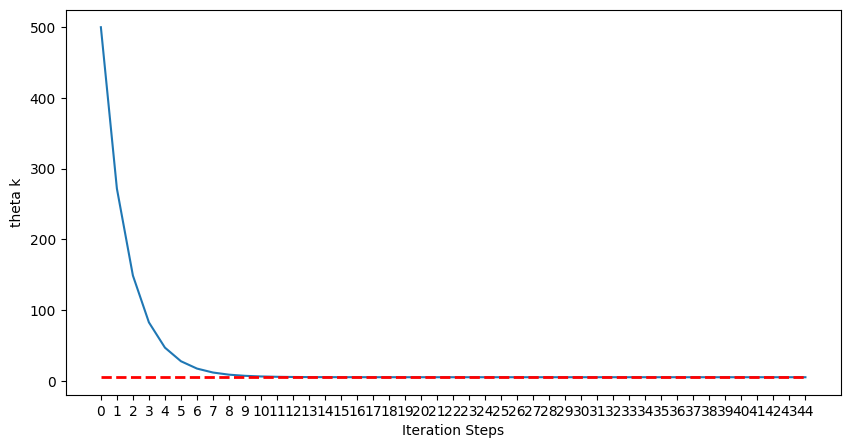

In [111]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(thetas)
x = np.linspace(0,len(thetas)-1,100)
y1 = real_theta*np.ones_like(x)
tik = np.arange(0,len(thetas))
plt.xticks(tik)
plt.xlabel('Iteration Steps')
plt.ylabel('theta k')
plt.plot(x,y1,'--',lw=2,color='red')


It only takes 44 steps to converge to the true value of $\theta$